In [18]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../')
from utiliT.io import read_pickle, dump_pickle
from scripts.instance import *
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
if os.path.isfile("../results/compiled_results/experimental_results.csv"):
    df = pd.read_csv("../results/compiled_results/experimental_results.csv")
else:
    result_files = os.listdir("../results/run_results")
    result_dicts = [read_pickle(f"../results/run_results/{file}") for file in result_files]
    df = pd.DataFrame(result_dicts)
    df['n_var'] = df['n1'] + df['n2'] * df['k']
    df['dropout']  = df['method'].apply(lambda x: 'dropout' in x)
    df['dr']  = df['method'].apply(lambda x: 'True' in x)
    df['group_method'] = df['method'].apply(lambda x: x.split('-')[0])
    df.to_csv("../results/compiled_results/experimental_results.csv")

<AxesSubplot:xlabel='k', ylabel='runtime'>

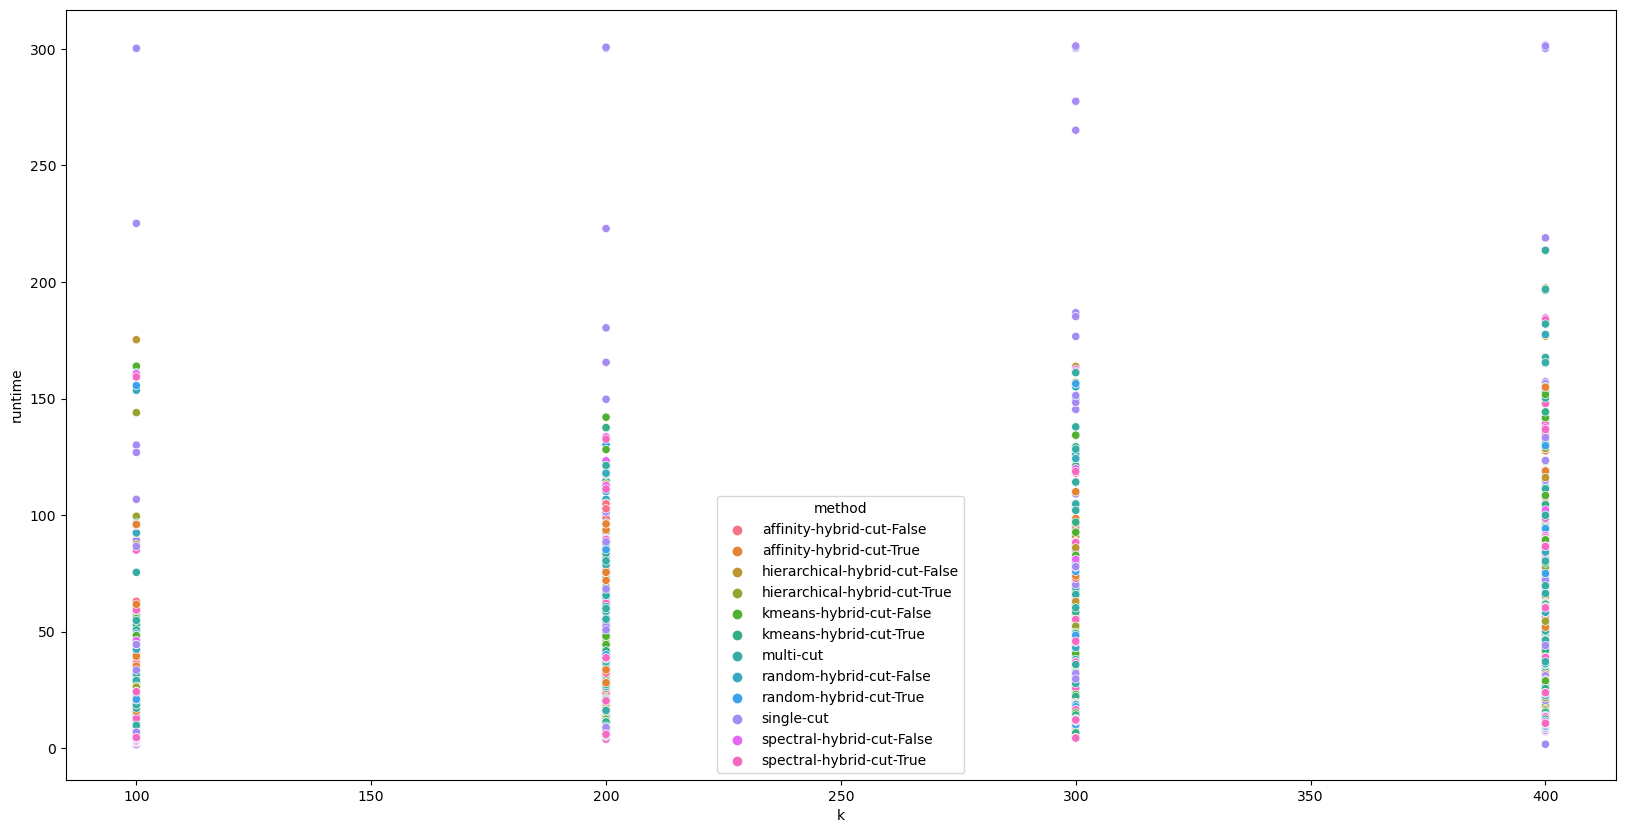

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
subset = df[~df['dropout']]
sns.scatterplot(data = subset, y = 'runtime', x = 'k', hue = 'method', ax = ax)

<AxesSubplot:xlabel='method', ylabel='runtime'>

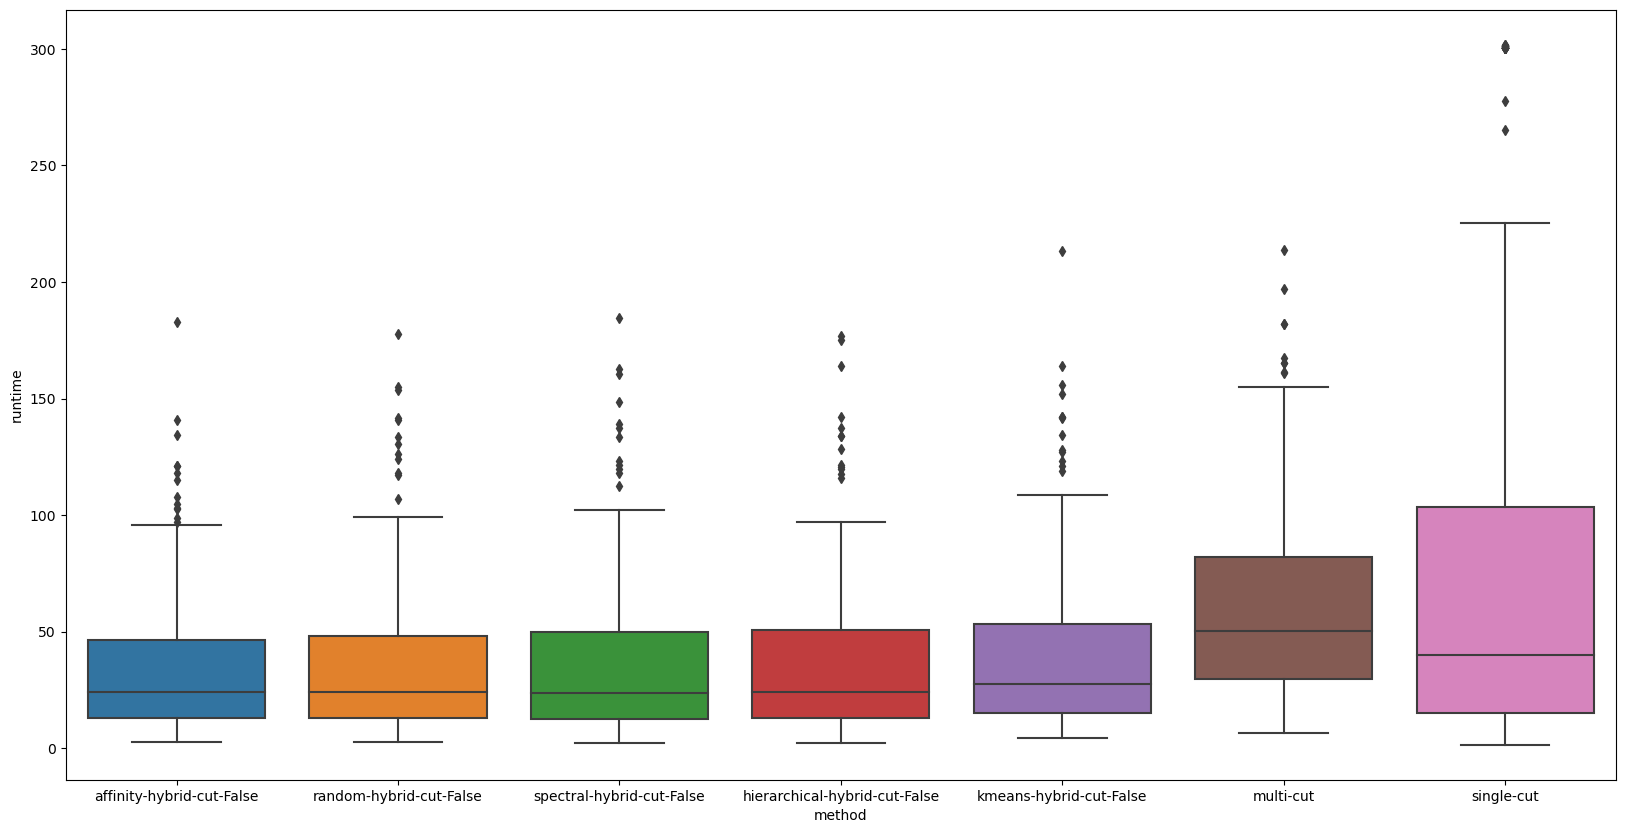

In [24]:
subset = df[(~df['dropout']) & (~df['PCA'])]
order_df = subset[['method','runtime']]
order_df = order_df.groupby(by = 'method').mean()
order_df = order_df.sort_values(by = 'runtime')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(data = subset, x = 'method', y = 'runtime', ax = ax, order = order)

<AxesSubplot:xlabel='method', ylabel='runtime'>

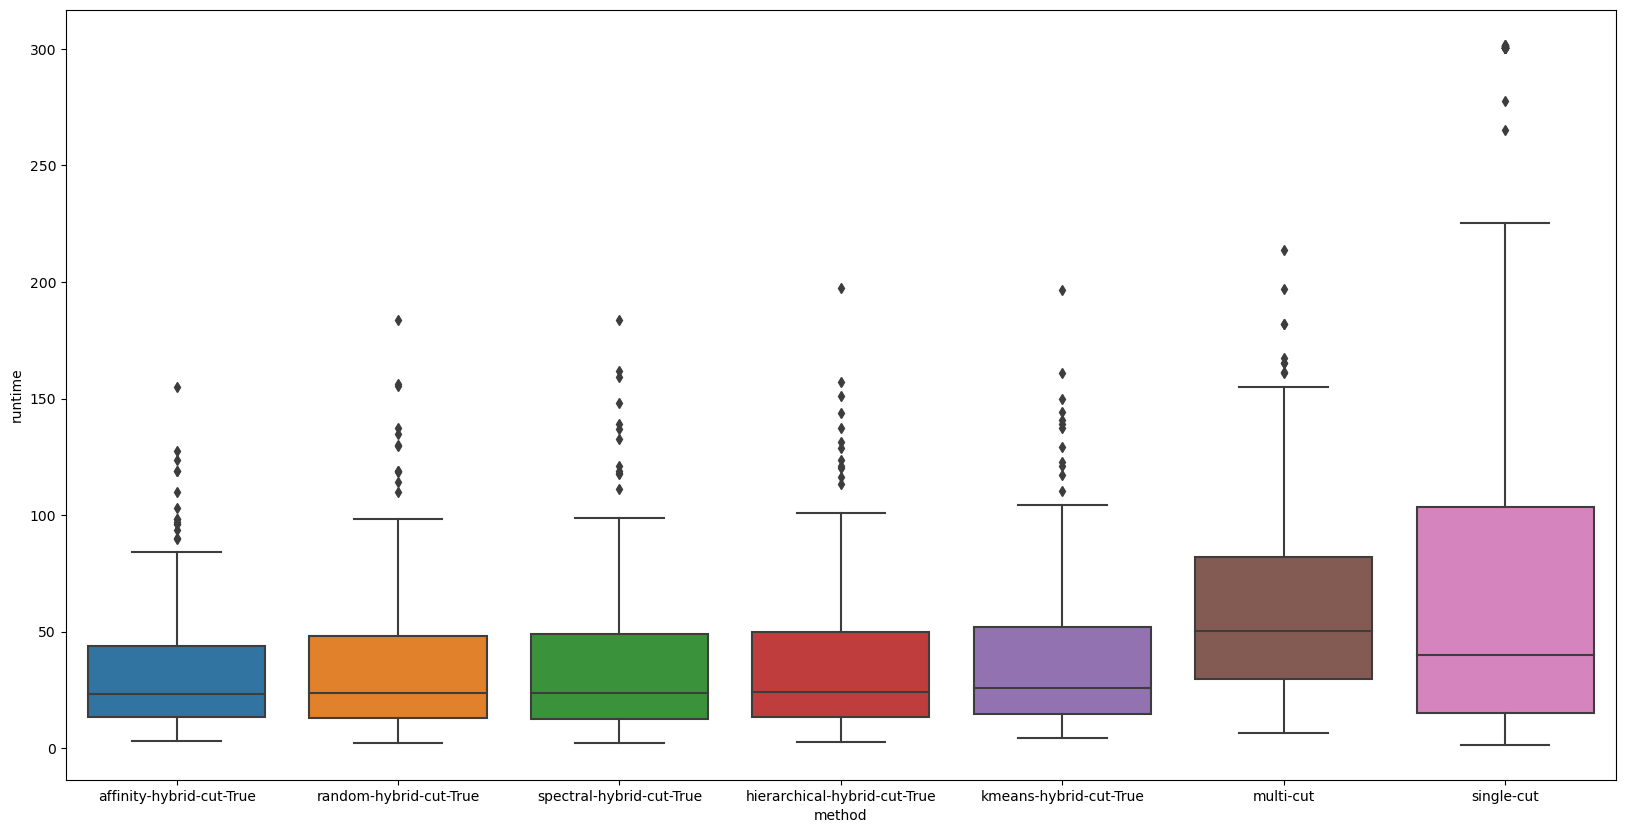

In [52]:
subset = df[(~df['dropout']) & (df['PCA'])]
single_and_multi = df[(df['method'] == 'single-cut') | (df['method'] == 'multi-cut')]
subset = pd.concat([subset, single_and_multi])
order_df = subset[['method','runtime']]
order_df = order_df.groupby(by = 'method').mean()
order_df = order_df.sort_values(by = 'runtime')
order = order_df.index
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(data = subset, x = 'method', y = 'runtime', ax = ax, order = order)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

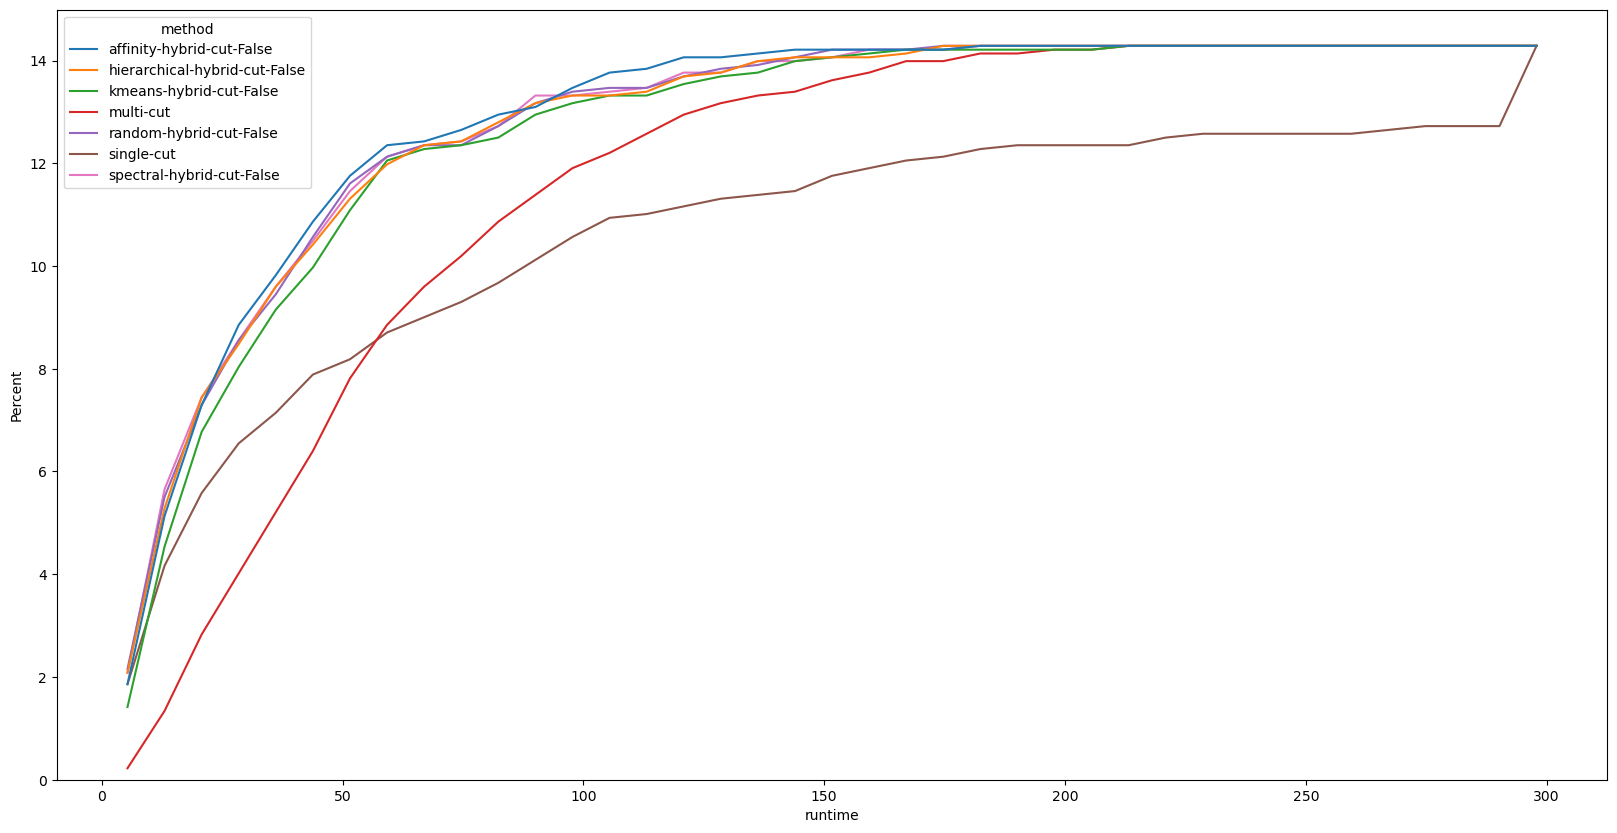

In [38]:
subset = df[(~df['dropout']) & (~df['PCA'])]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

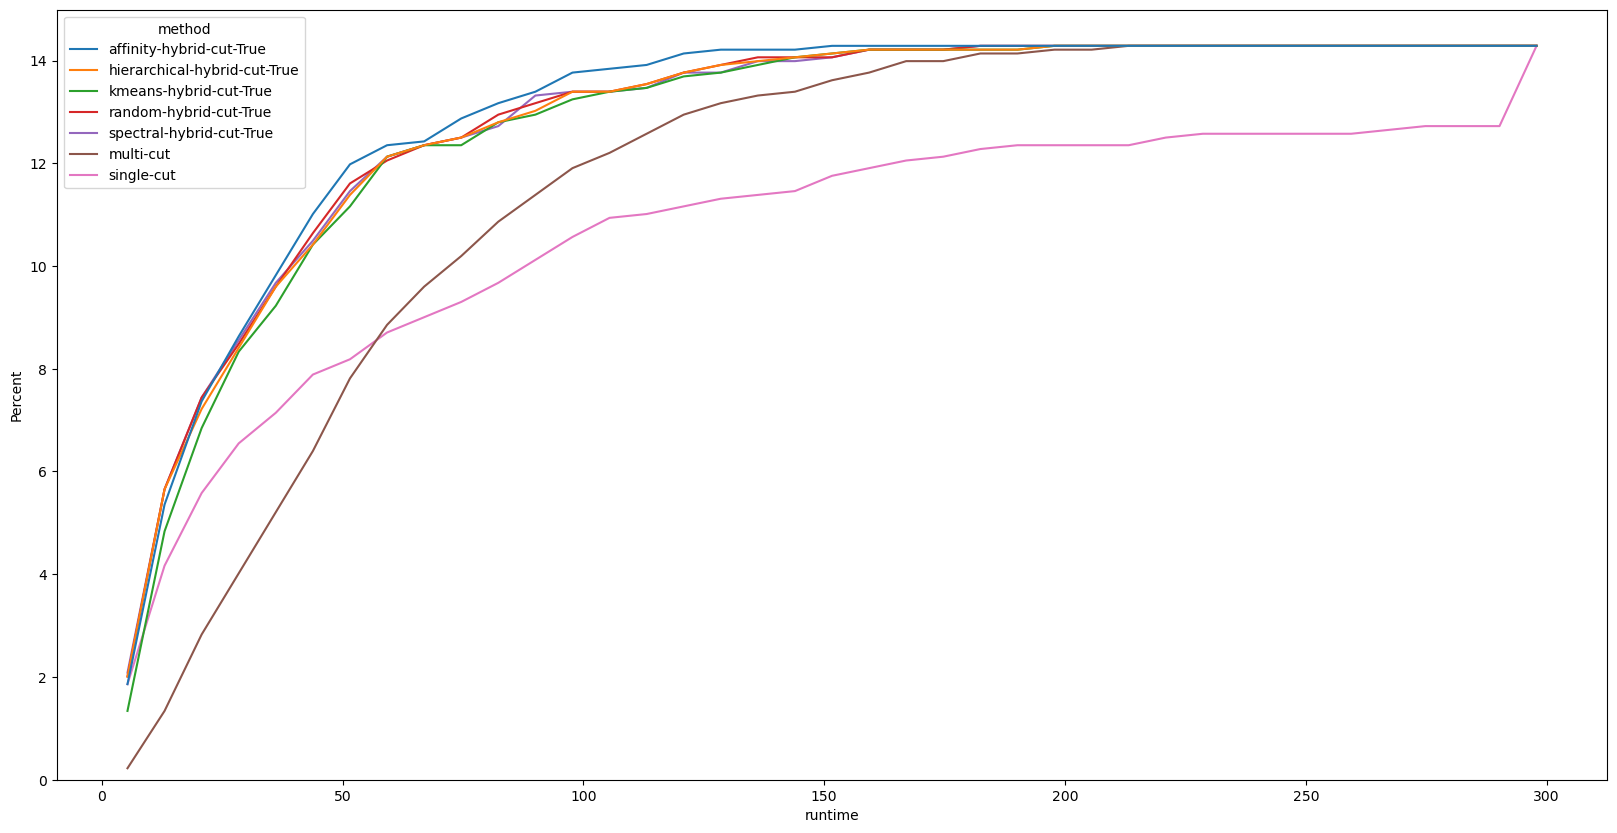

In [39]:
subset = df[(~df['dropout']) & (df['PCA'])]
single_and_multi = df[(df['method'] == 'single-cut') | (df['method'] == 'multi-cut')]
subset = pd.concat([subset, single_and_multi])
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

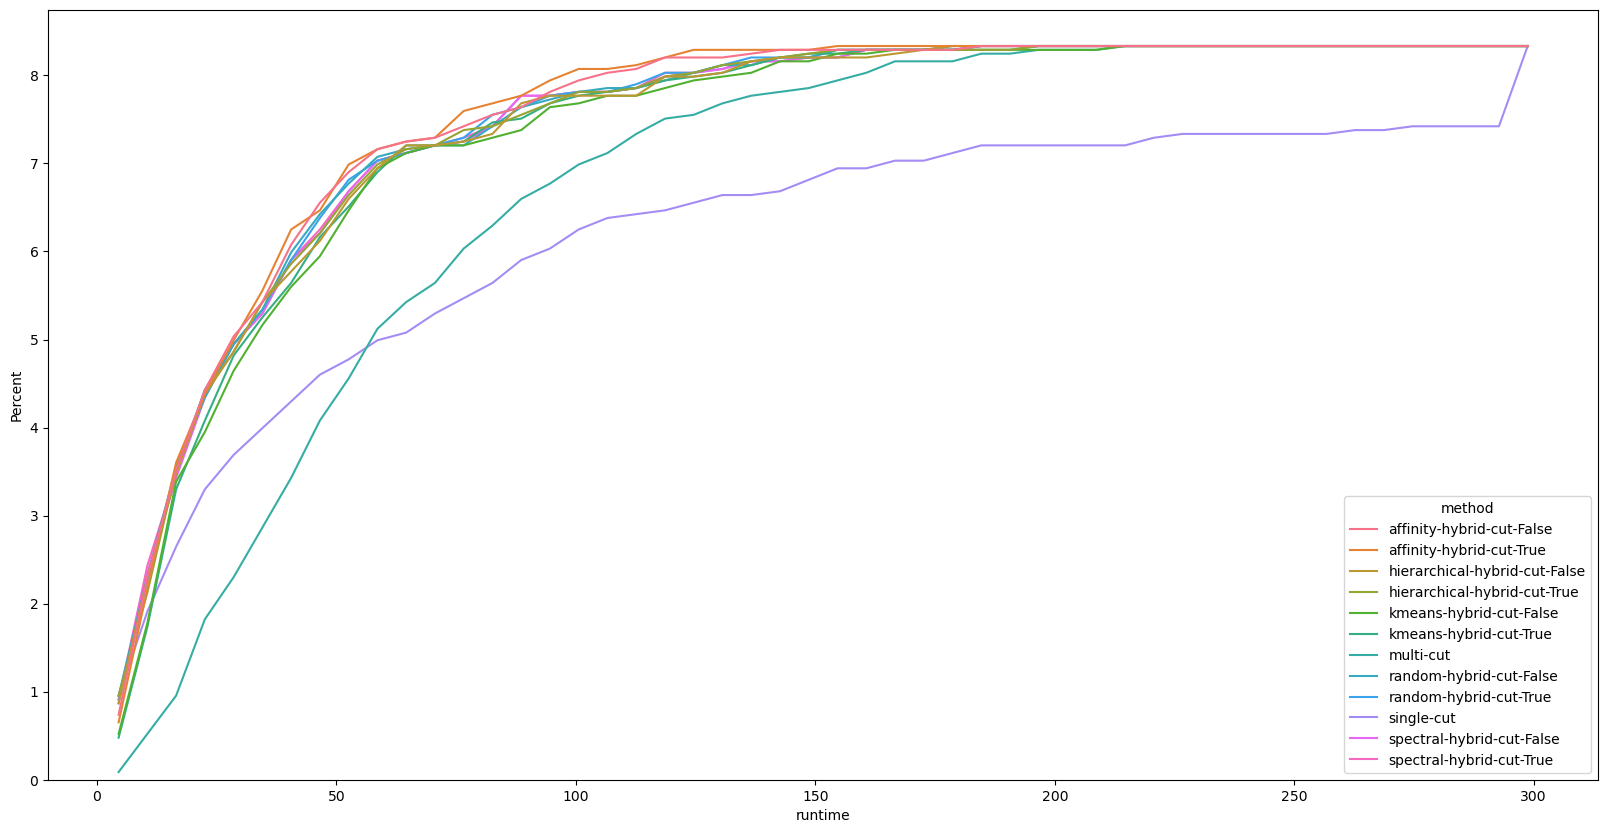

In [42]:
subset = df[~df['dropout']]
#single_and_multi = df[(df['method'] == 'single-cut') | (df['method'] == 'multi-cut')]
#subset = pd.concat([subset, single_and_multi])
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)

<AxesSubplot:xlabel='runtime', ylabel='Percent'>

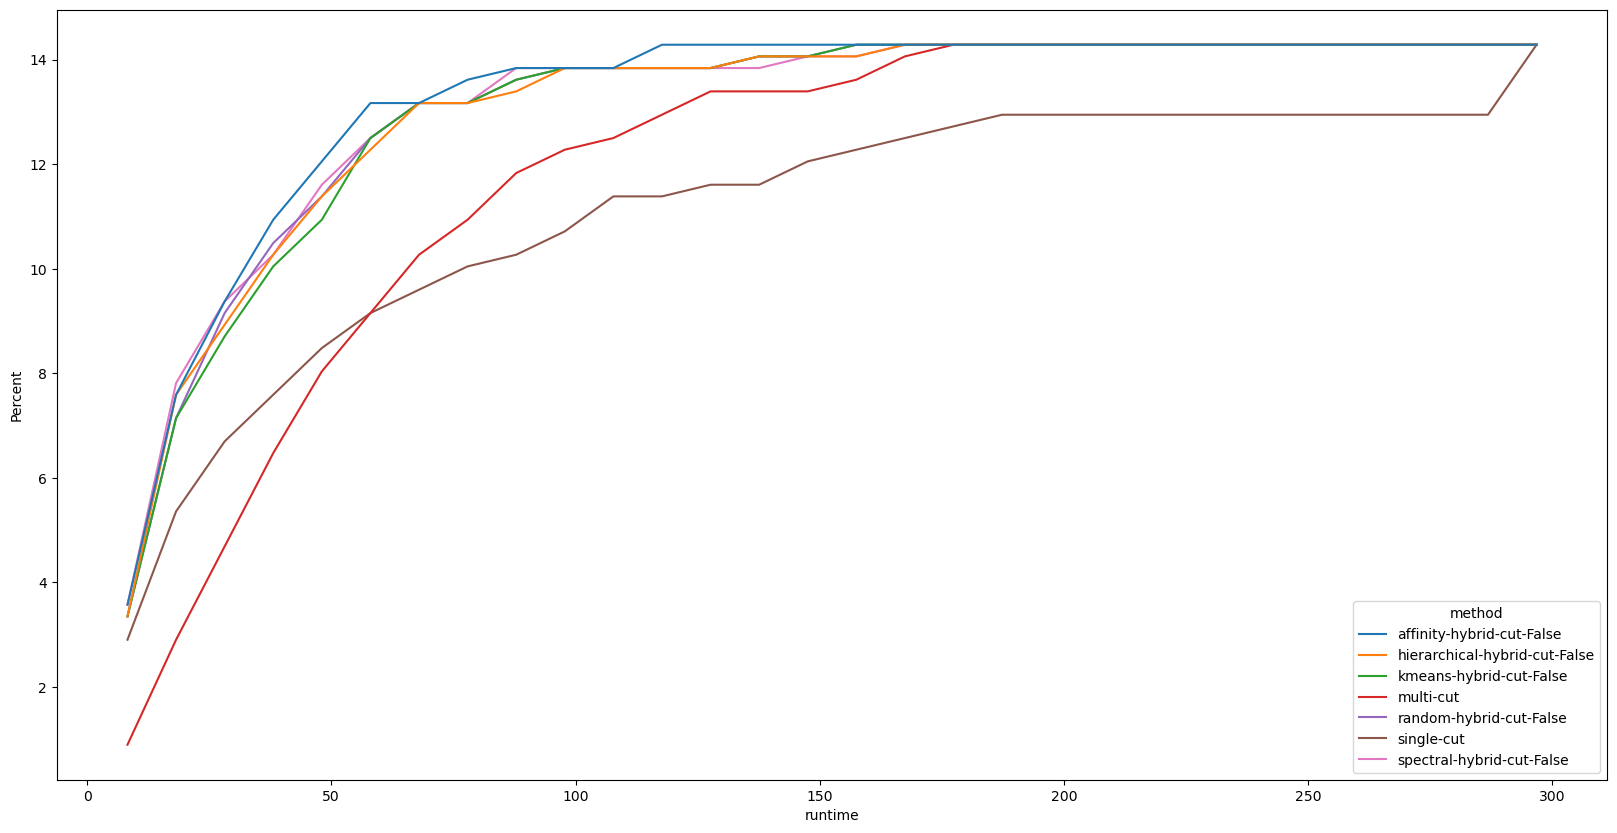

In [43]:
subset = df[(~df['dropout']) & (~df['PCA']) & (df['distribution'] == 'multipeak')]
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.histplot(data = subset,x = 'runtime',hue = 'method',
             element='poly', fill = False, cumulative=True,
             stat = "percent", common_norm=True, ax = ax)